## Installing libraries and dependencies

In [ ]:
!pip install selenium

In [ ]:
!apt-get update
!apt install chromium-chromedriver


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,753 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,259 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

In [ ]:
from selenium import webdriver
import time
import numpy as np
import pandas as pd
import os
import re
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options

## Selenium and Beautiful Soup to extract data from Seeking Alpha

In [ ]:
#set options parameters
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

#path to the ChromeDriver executable
driver = webdriver.Chrome(options=options)


### Extracting news titles

In [ ]:
# Base URL and pattern for the pages
base_url = 'https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page={}&to=2024-01-01T18%3A29%3A59.999Z'

# Number of pages to scrape
num_pages = 10

# Loop through each page
for page_number in range(1, num_pages + 1):
    # Construct the URL for the current page
    url = base_url.format(page_number)
    print(url)
    # Open the URL in the browser
    driver.get(url)

    # Wait for the necessary elements containing the news titles to be loaded
    element = WebDriverWait(driver, 10).until(
        #driver.find_element((By.CSS_SELECTOR, "[data-test-id='post-list-item-title']"))
        EC.presence_of_element_located((By.CSS_SELECTOR, 'a'))

    )

    # Get the page source and parse it with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    #news_titles = soup.find_all(attrs={"class": "text-share-text visited:text-share-text hover:text-share-text focus:text-share-text m-0 grow no-underline  text-x-large-r lg:text-large-r mb-4"})
    news_titles = soup.find_all(attrs={"data-test-id": "post-list-item-title"})


# Close the browser when done
driver.quit()


https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=1&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=2&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=3&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=4&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=5&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=6&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=7&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=8&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page

In [ ]:
title_list=[]
for i in news_titles:
    d=i.get_text()
    title_list.append(d)

### Extracting Dates

In [ ]:
# Base URL and pattern for the pages
base_url = 'https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page={}&to=2024-01-01T18%3A29%3A59.999Z'

# Number of pages to scrape
num_pages = 10

# Loop through each page
for page_number in range(1, num_pages + 1):
    # Construct the URL for the current page
    url = base_url.format(page_number)
    print(url)
    # Open the URL in the browser
    driver.get(url)

    # Wait for the necessary elements containing the news dates to be loaded
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, 'div'))

    )

    # Get the page source and parse it with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    news_dates = soup.find_all(attrs={"data-test-id": "post-list-date"})


# Close the browser when done
driver.quit()


https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=1&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=2&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=3&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=4&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=5&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=6&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=7&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page=8&to=2024-01-01T18%3A29%3A59.999Z
https://seekingalpha.com/symbol/AMZN/news?from=2022-12-31T18%3A30%3A00.000Z&page

In [ ]:
date_list=[]
for i in news_dates:
    d=i.get_text()
    date_list.append(d)

### Creating dataframes and exporting

In [ ]:
title_series = pd.Series(title_list)
date_series = pd.Series(date_list)

# Concatenate Series objects
result = pd.concat([title_series, date_series], axis=1, join='inner')  # Column-wise concatenation


In [ ]:
result.to_csv('datetest.csv')

Dataset


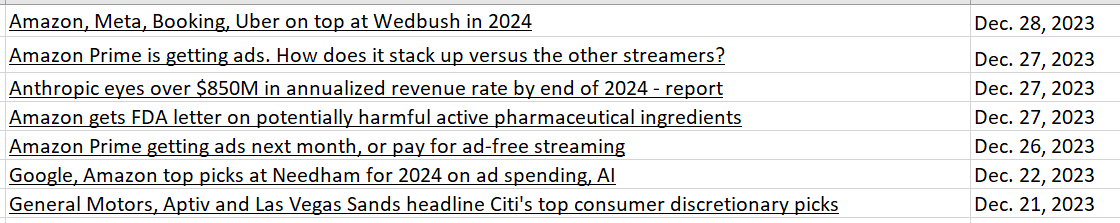